## EXPLORATORY DATA ANALYSIS

In [12]:
# Core libraries for numerical computations and data manipulation
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation and analysis
# Import the RobustScaler from scikit-learn
from sklearn.preprocessing import RobustScaler

# Visualization libraries for exploring and presenting data
import matplotlib.pyplot as plt  # Core plotting library
import seaborn as sns  # Enhanced statistical visualizations

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings to avoid clutter during analysis

# Apply a visually appealing plotting style
plt.style.use('bmh')  # 'bmh' style provides a clean, minimalist look for plots


In [4]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('/home/user/Data Science Portfolio - Likitha/Projects/TCR-Projects/Credit Card Fraud/creditcard.csv')  # Reading the CSV file containing transaction data

# Display the first five rows of the dataset
df.head()  # Quick overview of the dataset structure and first few rows


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Generate descriptive statistics for the numerical features in the dataset
df.describe()  # Provides insights into central tendency, dispersion, and range of the data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Check for missing values in the dataset
df.isnull().sum()  # Summarizes the count of missing values for each column


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Display the data types of each column in the dataset
df.dtypes  # Helps identify the types of data (e.g., int, float, object) for each column


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Non-fraud transactions: 99.83%
Fraud transactions: 0.17%


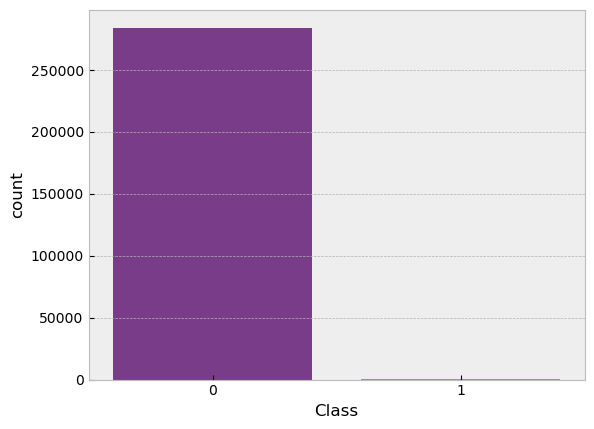

In [8]:
# Plot the count of each class (fraudulent vs non-fraudulent transactions)
sns.countplot(x='Class', data=df, palette='CMRmap')  # Visualizes the class distribution in the dataset

# Print the percentage of non-fraudulent transactions
print('Non-fraud transactions: {}%'.format(round(df.Class.value_counts()[0] / len(df) * 100.0, 2)))

# Print the percentage of fraudulent transactions
print('Fraud transactions: {}%'.format(round(df.Class.value_counts()[1] / len(df) * 100.0, 2)))


### Dataset Analysis: Imbalance and Mitigation Techniques

The dataset is **severely imbalanced**, with the majority of transactions being non-fraudulent. This imbalance poses challenges for machine learning algorithms, as they are biased towards the majority class, leading to high accuracy scores that can be misleading.

---

### Addressing Imbalanced Datasets

To handle the imbalance, we can use techniques like **undersampling** and **oversampling**:

1. **Oversampling**:
   - Increases the number of minority class samples in the training set.
   - **Advantage**: Retains all the original information in the dataset.
   - **Disadvantage**: Prone to overfitting as it artificially inflates the minority class.

2. **Undersampling**:
   - Reduces the number of majority class samples to match the minority class.
   - **Advantage**: Speeds up training by reducing dataset size.
   - **Disadvantage**: Risk of losing valuable information by discarding majority samples.

3. **SMOTE (Synthetic Minority Oversampling Technique)**:
   - A specialized form of oversampling that generates synthetic samples for the minority class.
   - Balances the dataset without duplicating data.

---

### Metrics for Evaluation

Using accuracy as a performance metric for imbalanced datasets is ineffective. Instead, use the following metrics:

- **Recall (Sensitivity)**:
  - Measures the percentage of correctly identified fraud cases.
  - Formula:  
    $$ \text{Recall (Fraud)} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

- **Specificity (Recall for Non-Fraud)**:
  - Measures the percentage of correctly identified non-fraud cases.
  - Formula:  
    $$ \text{Specificity} = \frac{\text{True Negatives}}{\text{True Negatives} + \text{False Positives}} $$

- **Precision**:
  - Evaluates the accuracy of predictions for a specific class:
    - **Fraud Cases**: Out of all predicted fraud cases, how many are correct.
    - **Non-Fraud Cases**: Out of all predicted non-fraud cases, how many are correct.

- **F1-Score**:
  - The harmonic mean of precision and recall, balancing both metrics effectively.
  - Formula:  
    $$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

---

### Feature Exploration

The features `Time` and `Amount` require detailed exploration to understand their distribution and skewness. Due to privacy concerns, the remaining features are anonymized and have undergone **PCA transformation** (Principal Component Analysis), which standardizes them for effective modeling.


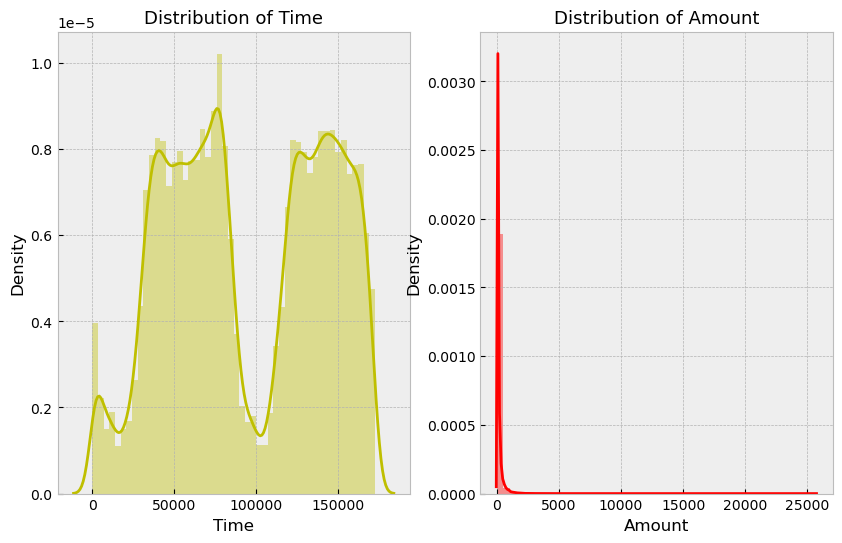

In [10]:
# Create a figure with two subplots to visualize the distributions of 'Time' and 'Amount'
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))  # Create a 1x2 grid of subplots with specified size

# Plot the distribution of 'Time' on the first axis
ax1 = sns.distplot(df['Time'], ax=ax1, color='y')  # Distribution plot of the 'Time' feature with yellow color
ax1.set_title('Distribution of Time', fontsize=13)  # Set the title for the first subplot

# Plot the distribution of 'Amount' on the second axis
ax2 = sns.distplot(df['Amount'], ax=ax2, color='r')  # Distribution plot of the 'Amount' feature with red color
ax2.set_title('Distribution of Amount', fontsize=13)  # Set the title for the second subplot

# Display the plots
plt.show()


### Distribution Analysis of `Time` and `Amount`

The distribution plots for `Time` and `Amount` provide the following insights:

1. **Time:**
   - The distribution of `Time` is multi-modal, suggesting patterns in the data that may correspond to specific periods during the day or distinct transaction cycles.
   - This feature is not scaled and spans a wide range of values.

2. **Amount:**
   - The distribution of `Amount` is highly skewed, with most transactions concentrated around smaller amounts.
   - A few high-value transactions act as **outliers**, which can negatively impact machine learning algorithms if not addressed.

---

### Feature Scaling with Robust Scaler

To normalize these distributions and mitigate the impact of outliers, we will apply **Feature Scaling**. Among the scaling techniques, the **Robust Scaler** is particularly suitable in this case because:

- It is less sensitive to outliers compared to other scaling methods like Min-Max Scaling or Standard Scaling.
- It transforms the features by removing the median and scaling them according to the interquartile range (IQR).

---

In [13]:
# Initialize the RobustScaler
rs = RobustScaler()

# Apply RobustScaler to the 'Amount' feature and create a new scaled column
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1, 1))  # Scale the 'Amount' feature

# Apply RobustScaler to the 'Time' feature and create a new scaled column
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1, 1))  # Scale the 'Time' feature

# Drop the original 'Time' and 'Amount' columns as they have been scaled
df.drop(['Time', 'Amount'], axis=1, inplace=True)  # Remove unscaled features to avoid redundancy


In [14]:
# Preserve the scaled 'amount' and 'time' columns
scaled_amount = df['scaled_amount']  # Store the scaled 'amount' column
scaled_time = df['scaled_time']  # Store the scaled 'time' column

# Drop the scaled columns from their current positions
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Reinsert the scaled columns at the beginning of the DataFrame
df.insert(0, 'scaled_amount', scaled_amount)  # Insert 'scaled_amount' as the first column
df.insert(0, 'scaled_time', scaled_time)  # Insert 'scaled_time' as the first column

# Display the first five rows of the modified DataFrame
df.head()


,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Scaling Complete

<font size='2' font> So now, `Time` and `Amount` are scaled and positioned at the beginning of the dataset for better organization. This ensures the features are ready for use in machine learning models, with minimized effects from outliers and large value ranges.


## Logistic Regression without SMOTE

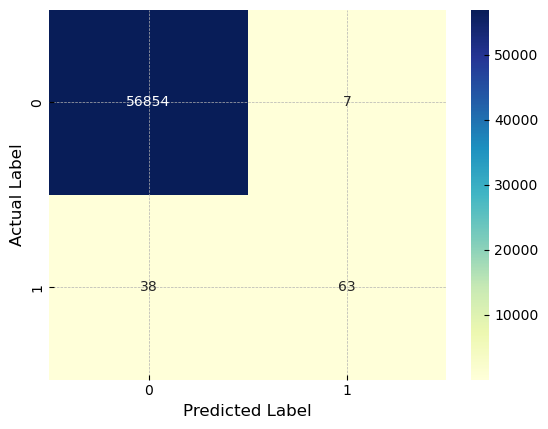

              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     56861
       Fraud       0.90      0.62      0.74       101

    accuracy                           1.00     56962
   macro avg       0.95      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [15]:
# Import necessary libraries for train-test split and evaluation
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_recall_curve, classification_report,
    precision_score, recall_score, accuracy_score
)

# Prepare the features (X) and the target (y) arrays
x = np.array(df.iloc[:, df.columns != 'Class'])  # Features (all columns except 'Class')
y = np.array(df.iloc[:, df.columns == 'Class'])  # Target (the 'Class' column)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)  # 80% train, 20% test split

# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)  # Train the model on the training set

# Predict the target values on the test set
y_pred = logreg.predict(x_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')  # Annotated heatmap with labels
plt.ylabel('Actual Label')  # Label for the Y-axis
plt.xlabel('Predicted Label')  # Label for the X-axis
plt.show()

# Define target class labels
labels = ['Non-fraud', 'Fraud']

# Print the classification report
print(classification_report(y_test, y_pred, target_names=labels))


### Model Evaluation: Logistic Regression

#### Confusion Matrix Analysis
The confusion matrix provides the following insights:
- The model predicts **non-fraudulent transactions (0)** almost perfectly, as shown by the high number of true negatives (top-left of the confusion matrix).
- However, the model struggles with **fraudulent transactions (1)**, resulting in a relatively high number of false negatives.

---

#### Classification Report
The key metrics for evaluating the model's performance:
1. **Precision**:
   - **Non-fraud:** Perfect precision (1.00), meaning all predicted non-fraud cases are correct.
   - **Fraud:** Precision is 0.90, indicating that 90% of the transactions flagged as fraud are actually fraudulent.

2. **Recall**:
   - **Non-fraud:** Perfect recall (1.00), meaning the model identifies all legitimate transactions correctly.
   - **Fraud:** Recall is 0.62, meaning the model correctly identifies only 62% of actual fraud cases, missing a significant portion (false negatives).

3. **F1-Score**:
   - **Fraud:** The F1-score is 0.74, reflecting the imbalance between precision and recall.

4. **Accuracy**:
   - While the model achieves an overall accuracy of 1.00, this metric is misleading in imbalanced datasets as it heavily favors the majority class.

---

#### Key Observations
- The model is biased toward the **majority class (non-fraudulent transactions)** due to the severe class imbalance.
- The **recall for fraudulent transactions** (0.62) is inadequate for real-world fraud detection, where missing fraud cases (false negatives) can lead to significant financial losses.

---

#### Next Steps
To improve the model's performance for the minority class:
1. **Resampling Techniques**:
   - Apply **oversampling** (e.g., SMOTE) to generate synthetic fraud samples or **undersampling** to balance the dataset.
2. **Algorithm Selection**:
   - Use algorithms better suited for imbalanced data, such as Random Forests, Gradient Boosting (e.g., XGBoost), or ensemble methods.
3. **Metric Optimization**:
   - Focus on metrics like **F1-score**, **Precision-Recall AUC**, and **specificity** instead of accuracy.

This analysis highlights the limitations of the Logistic Regression model for fraud detection and sets the stage for improvements using advanced techniques.


Transaction Number x_train dataset:  (227845, 30)
Transaction Number y_train dataset:  (227845, 1)
Transaction Number x_test dataset:  (56962, 30)
Transaction Number y_test dataset:  (56962, 1)
Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, the shape of train_x: (454908, 30)
After OverSampling, the shape of train_y: (454908,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


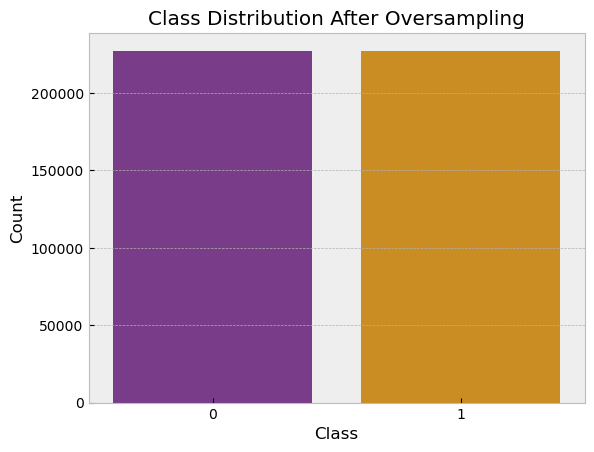

In [17]:
# Import SMOTE for oversampling
from imblearn.over_sampling import SMOTE

# Print the initial shapes of the training and testing datasets
print("Transaction Number x_train dataset: ", x_train.shape)  # Shape of the training feature set
print("Transaction Number y_train dataset: ", y_train.shape)  # Shape of the training target set
print("Transaction Number x_test dataset: ", x_test.shape)  # Shape of the testing feature set
print("Transaction Number y_test dataset: ", y_test.shape)  # Shape of the testing target set

# Display the distribution of the target classes before oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))  # Count of fraud cases in training data
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))  # Count of non-fraud cases

# Apply SMOTE for oversampling the minority class
sm = SMOTE(random_state=2)  # Initialize SMOTE with a random state for reproducibility
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())  # Resample the training data

# Print the shapes of the training datasets after oversampling
print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))  # Shape of oversampled feature set
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))  # Shape of oversampled target set

# Display the distribution of the target classes after oversampling
print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s == 1) / len(y_train_s) * 100.0))  # Percentage of fraud cases
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s == 0) / len(y_train_s) * 100.0))  # Percentage of non-fraud cases

# Visualize the class distribution after oversampling using a count plot
sns.countplot(x=y_train_s, palette='CMRmap')  # Plot the distribution of the resampled target classes
plt.title('Class Distribution After Oversampling')  # Add a title to the plot
plt.xlabel('Class')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()


### Dataset Balanced and Ready for Modeling

Now that the dataset has been balanced using **SMOTE**, we can build a Logistic Regression model. However, it is important to note the following:

1. **Avoiding Data Leakage**:
   - **SMOTE** was applied **after splitting the dataset into training and testing sets**. This ensures that the synthetic samples are created only within the training set, preventing information from the test set from leaking into the training process.

2. **Preventing Overfitting**:
   - Applying SMOTE directly to the entire dataset before splitting could lead to overfitting, as the test data would contain synthetic patterns derived from the training set.

By carefully applying SMOTE after cross-validation and maintaining proper data hygiene, we ensure a more robust and realistic model evaluation.

## Logistic Regression with SMOTE

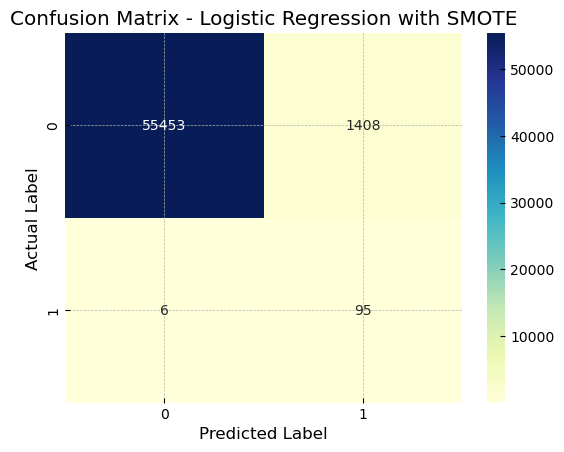

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [18]:
# Train a Logistic Regression model on the balanced dataset
logreg = LogisticRegression()  # Initialize Logistic Regression
logreg.fit(x_train_s, y_train_s)  # Fit the model on the SMOTE-oversampled training data

# Predict the labels on the original (unbalanced) test dataset
y_pred = logreg.predict(x_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')  # Annotated heatmap
plt.ylabel('Actual Label')  # Label for Y-axis
plt.xlabel('Predicted Label')  # Label for X-axis
plt.title('Confusion Matrix - Logistic Regression with SMOTE')  # Title for the heatmap
plt.show()

# Print the classification report for detailed performance metrics
print(classification_report(y_test, y_pred))


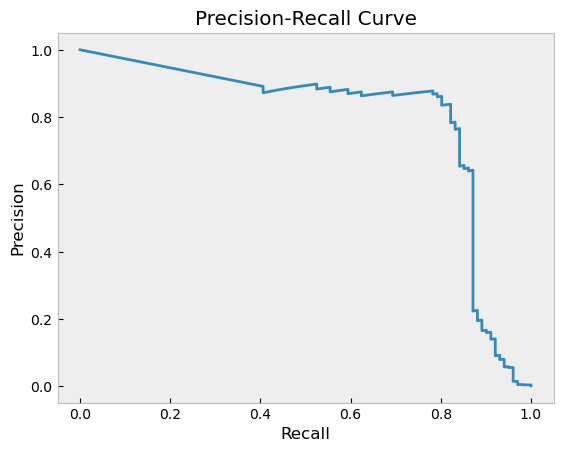

In [19]:
# Obtain the predicted probabilities for the positive class (fraud) from the Logistic Regression model
y_pred_prob = logreg.predict_proba(x_test)[:, 1]  # Predicted probabilities for fraud (class 1)

# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot the Precision-Recall Curve
plt.plot(recall, precision)  # Precision vs. Recall curve
plt.xlabel('Recall')  # Label for the X-axis
plt.ylabel('Precision')  # Label for the Y-axis
plt.title('Precision-Recall Curve')  # Title for the plot
plt.grid()  # Add grid for better visualization
plt.show()


### Precision-Recall Analysis

From the **Precision-Recall Curve** and evaluation metrics, we observe the following:

1. **High Recall**:
   - The model is effective at identifying the majority of fraudulent transactions (high recall).
   - This ensures that most fraud cases are flagged, which is crucial for fraud detection.

2. **Low Precision**:
   - The model also flags a significant number of legitimate transactions as fraudulent (low precision).
   - This results in **false positives**, which can frustrate customers and harm the reputation of the financial institution.

---

### Importance of Balancing Precision and Recall

While high recall is important for detecting fraud, low precision means:
- Many legitimate transactions are falsely flagged as fraudulent.
- Customers may lose trust in the system, leading to dissatisfaction and potential loss of business for the financial institution.

---


## Displaying the predictions

In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Prediciting an arbitrary input data

In [26]:
logreg.predict([[-0.63699057,  6.74100468, -1.53032404, -0.23597764,  1.85501924,
        1.25543555, -1.684011  ,  2.0743704 ,  1.77938361, -0.20089071,
       -0.10246641, -0.07156013,  1.01670848,  0.2247269 , -0.13841633,
       -0.38018538,  0.77750365, -0.05996581, -0.28821343,  0.64818512,
        0.78002443, -0.27823953,  0.03182868,  0.85273687, -0.42126432,
       -0.22027806,  0.19826107, -0.05929797,  0.10316612, -0.2738302 ]])

array([0], dtype=int64)

## The prediction obtained is 0